For the geographic sanitary regions: https://analisi.transparenciacatalunya.cat/Salut/Regions-sanit-ries/q2jd-tqye/about_data
For the population data: https://analisi.transparenciacatalunya.cat/Salut/Registre-central-de-poblaci-del-CatSalut-poblaci-p/ftq4-h9vk/about_data


2 colors map: Socioeconomic vs drug usage
Change among years of the consumption
Pie chart for the regions?
Barcelona Metropolitan Area vs Rest of Catalonia

C:\Users\ismar\AppData\Local\Temp\ipykernel_9876\2712990516.py:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset.csv", encoding='latin-1')


Before mapping:
GeoDataFrame regions: ['Lleida' 'Camp de Tarragona' "Terres de l'Ebre" 'Girona'
 'Catalunya Central' 'Penedès' 'Alt Pirineu i Aran'
 'Barcelona Metropolitana Sud' 'Barcelona Metropolitana Nord'
 'Barcelona Ciutat' 'No consta']
CSV regions: ['ALT PIRINEU i ARAN' 'ALTRES' 'BARCELONA' 'BARCELONA CIUTAT'
 'BARCELONA METROPOLITANA NORD' 'BARCELONA METROPOLITANA SUD'
 'CAMP DE TARRAGONA' 'CATALUNYA CENTRAL' 'GIRONA' 'LLEIDA' 'PENEDÃ\x88S'
 'SENSE ESPECIFICAR' "TERRES DE L'EBRE"]

After mapping:
GeoDataFrame regions: ['Alt Pirineu i Aran', 'Barcelona Ciutat', 'Barcelona Metropolitana Nord', 'Barcelona Metropolitana Sud', 'Camp de Tarragona', 'Catalunya Central', 'Girona', 'Lleida', 'No consta', 'Penedès', "Terres de l'Ebre"]
CSV regions: ['Alt Pirineu i Aran', 'Barcelona Ciutat', 'Barcelona Metropolitana Nord', 'Barcelona Metropolitana Sud', 'Camp de Tarragona', 'Catalunya Central', 'Girona', 'Lleida', 'No consta', 'Penedès', "Terres de l'Ebre"]

Merged GeoDataFrame shape: (13

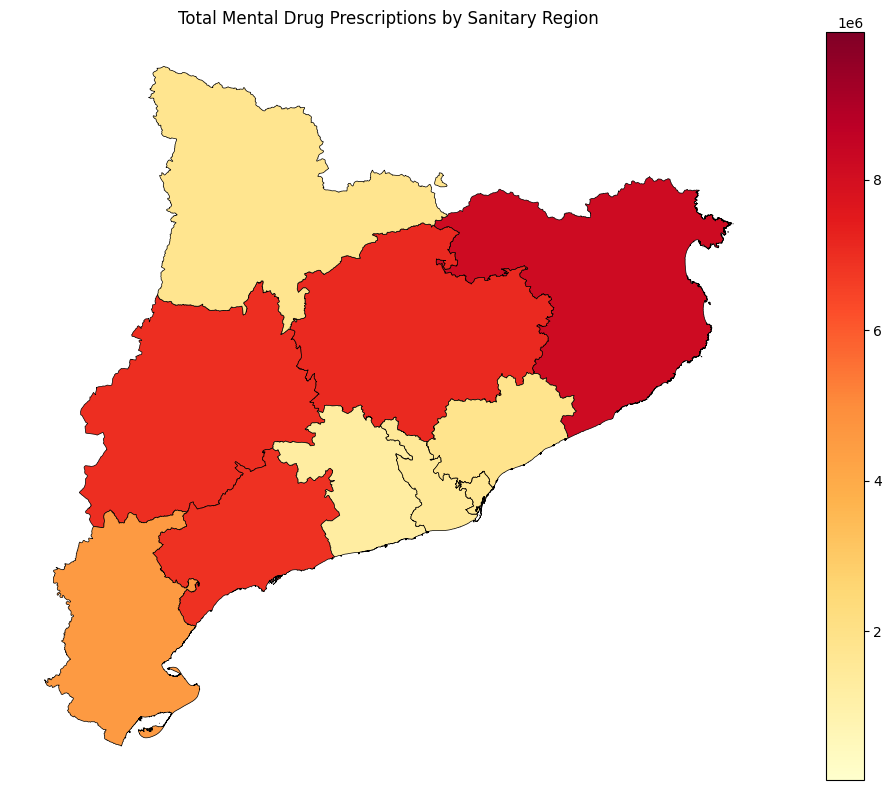

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the GeoJSON file
gdf = gpd.read_file('Ad_Dataset.geojson')

# Read the CSV file
df = pd.read_csv("Dataset.csv", encoding='latin-1')

# Rename the corrupted column names
column_mapping = {
    'regiÃ³ sanitÃ ria': 'regió sanitària',
}
df = df.rename(columns=column_mapping)

# Select the columns we need
columns_to_merge = df[['regió sanitària', 'grup ATC nivell 3', 'nombre de receptes']]

# Filter for mental groups
mental_groups = [
    "ANTIDEPRESIVOS",
    "ANSIOLITICOS",
    "ANTIPSICOTICOS", 
    "HIPNOTICOS Y SEDANTES",
    "FARMACOS USADOS EN DESORDENES ADICTIVOS",
    "PSICOLEPTICOS Y PSICOANALEPTICOS EN COMBINACION",
    "PSICOESTIMULANTES, AGENTES UTILIZADOS PARA EL TDAH Y NOOTROPICOS",
    "PSICOESTIMULANTES, AGENTES UTILIZADOS PARA LA ADHD Y NOOTROPICOS",
    "OTROS FARMACOS QUE ACTUAN SOBRE EL SISTEMA NERVIOSO"
]

mental_drugs_df = columns_to_merge[columns_to_merge['grup ATC nivell 3'].isin(mental_groups)]

# SUM ALL mental drug prescriptions grouped ONLY by sanitary region
summed_by_region = mental_drugs_df.groupby('regió sanitària')['nombre de receptes'].sum().reset_index()

# Rename the 'nom' column in GeoDataFrame to match
gdf = gdf.rename(columns={'nom': 'regió sanitària'})

print("Before mapping:")
print(f"GeoDataFrame regions: {gdf['regió sanitària'].unique()}")
print(f"CSV regions: {summed_by_region['regió sanitària'].unique()}")

# Create a mapping dictionary to standardize region names
region_mapping = {
    'ALT PIRINEU i ARAN': 'Alt Pirineu i Aran',
    'ALTRES': 'No consta',  # Map 'ALTRES' to 'No consta'
    'BARCELONA': 'Barcelona Ciutat',  # Assuming BARCELONA refers to Barcelona Ciutat
    'BARCELONA CIUTAT': 'Barcelona Ciutat',
    'BARCELONA METROPOLITANA NORD': 'Barcelona Metropolitana Nord',
    'BARCELONA METROPOLITANA SUD': 'Barcelona Metropolitana Sud',
    'CAMP DE TARRAGONA': 'Camp de Tarragona',
    'CATALUNYA CENTRAL': 'Catalunya Central',
    'GIRONA': 'Girona',
    'LLEIDA': 'Lleida',
    'PENEDÃ\x88S': 'Penedès',  # Fix encoding issue
    'SENSE ESPECIFICAR': 'No consta',  # Map 'SENSE ESPECIFICAR' to 'No consta'
    "TERRES DE L'EBRE": "Terres de l'Ebre"
}

# Apply the mapping to the CSV data
summed_by_region['regió sanitària'] = summed_by_region['regió sanitària'].map(region_mapping)

# Remove any rows that couldn't be mapped (if any)
summed_by_region = summed_by_region.dropna(subset=['regió sanitària'])

print("\nAfter mapping:")
print(f"GeoDataFrame regions: {sorted(gdf['regió sanitària'].unique())}")
print(f"CSV regions: {sorted(summed_by_region['regió sanitària'].unique())}")

# Merge the DataFrames
merged_gdf = gdf.merge(summed_by_region, on='regió sanitària', how='left')

print(f"\nMerged GeoDataFrame shape: {merged_gdf.shape}")
print("Merged data head:")
print(merged_gdf[['regió sanitària', 'nombre de receptes']].head())

# Check for any missing data after merge
missing_regions = merged_gdf[merged_gdf['nombre de receptes'].isna()]
print(f"\nRegions with missing data: {len(missing_regions)}")
if len(missing_regions) > 0:
    print("Regions without prescription data:")
    print(missing_regions['regió sanitària'].tolist())

# Now plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

merged_gdf.plot(column='nombre de receptes', 
                ax=ax, 
                legend=True,
                cmap='YlOrRd',
                edgecolor='black',
                linewidth=0.5,
                missing_kwds={'color': 'lightgrey', 'label': 'No data'})

plt.title('Total Mental Drug Prescriptions by Sanitary Region')
plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
com_to_reg = {
    "Alt Camp": "Camp de Tarragona",
    "Alt Empordà": "Girona",
    "Alt Penedès": "Penedès",
    "Alt Urgell": "Alt Pirineu i Aran",
    "Alta Ribagorça": "Alt Pirineu i Aran",
    "Anoia": "Penedès",
    "Aran": "Alt Pirineu i Aran",
    "Bages": "Catalunya Central",
    "Baix Camp": "Camp de Tarragona",
    "Baix Ebre": "Terres de l'Ebre",
    "Baix Empordà": "Girona",
    "Baix Llobregat": "Barcelona Metropolitana Sud",
    "Baix Penedès": "Penedès",
    "Barcelonès": "Barcelona Ciutat",
    "Berguedà": "Catalunya Central",
    "Cerdanya": "Alt Pirineu i Aran",
    "Conca de Barberà": "Camp de Tarragona",
    "Garraf": "Penedès",
    "Garrigues": "Lleida",
    "Garrotxa": "Girona",
    "Gironès": "Girona",
    "Maresme": "Barcelona Metropolitana Nord",
    "Moianès": "Catalunya Central",
    "Montsià": "Terres de l'Ebre",
    "Noguera": "Lleida",
    "Osona": "Catalunya Central",
    "Pallars Jussà": "Alt Pirineu i Aran",
    "Pallars Sobirà": "Alt Pirineu i Aran",
    "Pla d'Urgell": "Lleida",
    "Pla de l'Estany": "Girona",
    "Priorat": "Camp de Tarragona",
    "Ribera d'Ebre": "Terres de l'Ebre",
    "Ripollès": "Girona",
    "Segarra": "Lleida",
    "Segrià": "Lleida",
    "Selva": "Girona",
    "Solsonès": "Catalunya Central",
    "Tarragonès": "Camp de Tarragona",
    "Terra Alta": "Terres de l'Ebre",
    "Urgell": "Lleida",
    "Vallès Occidental": "Barcelona Metropolitana Nord",
    "Vallès Oriental": "Barcelona Metropolitana Nord"
}
# We are considering an easier mapping than the actual one, there is no available data relating municipality with sanitary regions

Reading GeoJSON file...
GeoJSON regions: ['Lleida' 'Camp de Tarragona' "Terres de l'Ebre" 'Girona'
 'Catalunya Central' 'Penedès' 'Alt Pirineu i Aran'
 'Barcelona Metropolitana Sud' 'Barcelona Metropolitana Nord'
 'Barcelona Ciutat' 'No consta']

Reading population CSV file...


C:\Users\ismar\AppData\Local\Temp\ipykernel_9876\3792014096.py:19: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_population = pd.read_csv('Ad_Dataset2.csv', encoding='latin-1')


Columns in population CSV:
['any', 'codi RegiÃ³ SanitÃ\xa0ria', 'RegiÃ³ SanitÃ\xa0ria', 'codi Ã\x80rea BÃ\xa0sica de Saut', 'Ã\x80rea BÃ\xa0sica de Salut', 'gÃ¨nere', 'edat', 'poblaciÃ³ oficial']
Available years: [np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Using data from year: 2025
Filtered data shape: (76469, 8)

Population data regions: ['ALT PIRINEU i ARAN' 'BARCELONA CIUTAT' 'BARCELONA METROPOLITANA NORD'
 'BARCELONA METROPOLITANA SUD' 'CAMP DE TARRAGONA' 'CATALUNYA CENTRAL'
 'GIRONA' 'LLEIDA' 'PENEDÃ\x88S' "TERRES DE L'EBRE"]

After mapping - GeoJSON regions: ['Alt Pirineu i Aran', 'Barcelona Ciutat', 'Barcelona Metropolitana Nord', 'Barcelona Metropolitana Sud', 'Camp de Tarragona', 'Catalunya Central', 'Girona', 'Lleida', 'No consta', 'Penedès', "Terres de l'Ebre"]
After mapping - Population regions:

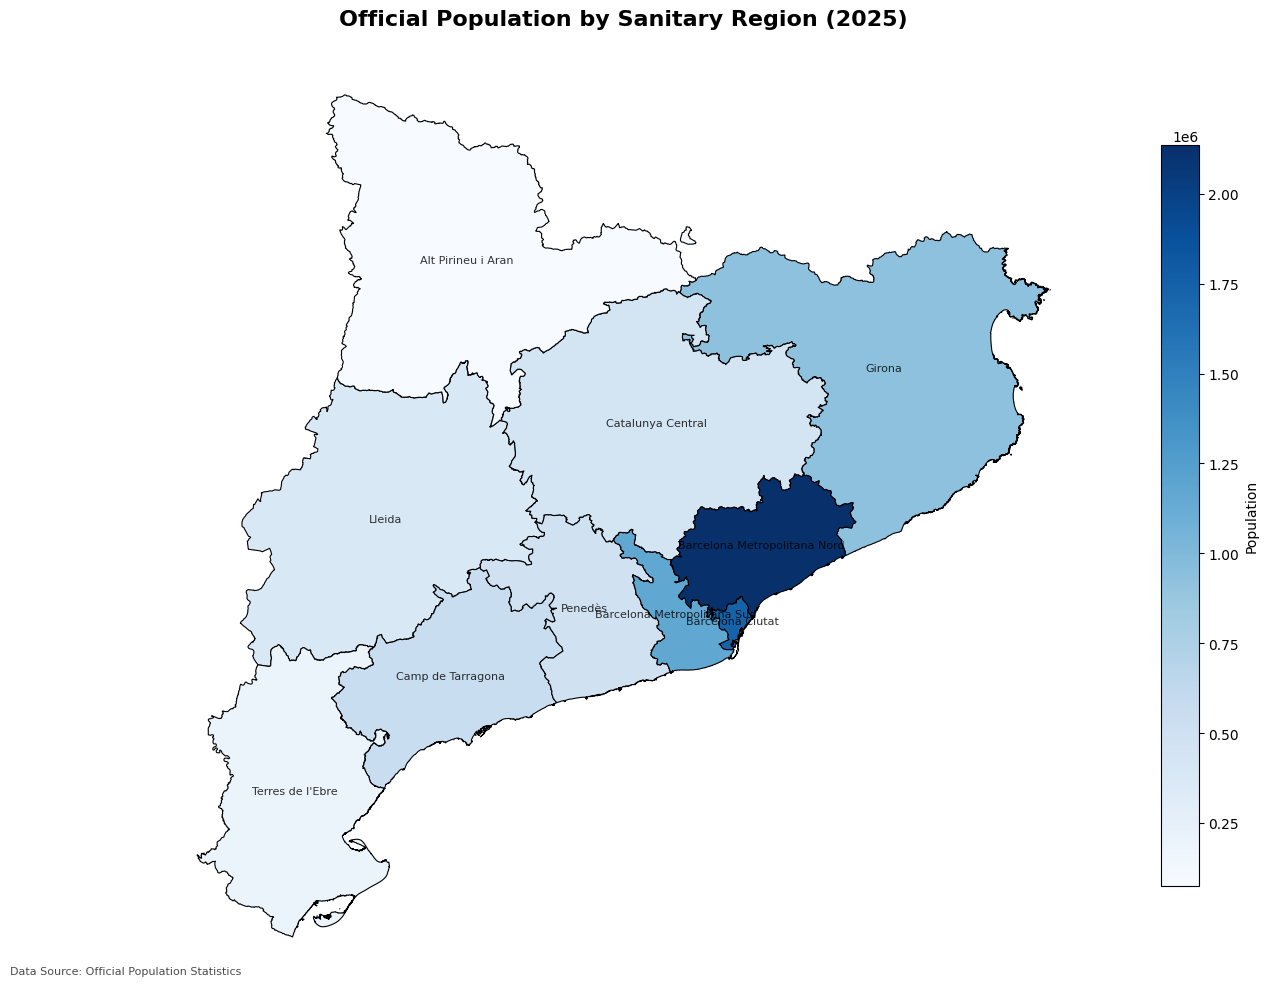

In [6]:
# create_population_map.py
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def main():
    # Read the GeoJSON file
    print("Reading GeoJSON file...")
    gdf = gpd.read_file('Ad_Dataset.geojson')
    
    # Rename the region column in GeoJSON
    gdf = gdf.rename(columns={'nom': 'Regió Sanitària'})
    
    print(f"GeoJSON regions: {gdf['Regió Sanitària'].unique()}")
    
    # Read the population CSV file
    print("\nReading population CSV file...")
    try:
        df_population = pd.read_csv('Ad_Dataset2.csv', encoding='latin-1')
        
        # Display column names to see what we're working with
        print("Columns in population CSV:")
        print(df_population.columns.tolist())
        
        # Rename columns if they have encoding issues
        if 'RegiÃ³ SanitÃ ria' in df_population.columns:
            df_population = df_population.rename(columns={'RegiÃ³ SanitÃ ria': 'Regió Sanitària'})
        if 'poblaciÃ³ oficial' in df_population.columns:
            df_population = df_population.rename(columns={'poblaciÃ³ oficial': 'població oficial'})
        
        # Check available years
        available_years = df_population['any'].unique()
        print(f"Available years: {sorted(available_years)}")
        
        # Filter for year 2025 (or use latest available)
        if 2025 in available_years:
            df_2025 = df_population[df_population['any'] == 2025]
            print(f"Using data from year: 2025")
        else:
            latest_year = max(available_years)
            df_2025 = df_population[df_population['any'] == latest_year]
            print(f"2025 not found. Using latest available year: {latest_year}")
        
        print(f"Filtered data shape: {df_2025.shape}")
        
        # Sum population by region
        population_by_region = df_2025.groupby('Regió Sanitària')['població oficial'].sum().reset_index()
        
        print(f"\nPopulation data regions: {population_by_region['Regió Sanitària'].unique()}")
        
        # Mapping dictionary to standardize region names
        region_mapping = {
            'ALT PIRINEU i ARAN': 'Alt Pirineu i Aran',
            'ALTRES': 'No consta',
            'BARCELONA': 'Barcelona Ciutat',
            'BARCELONA CIUTAT': 'Barcelona Ciutat',
            'BARCELONA METROPOLITANA NORD': 'Barcelona Metropolitana Nord',
            'BARCELONA METROPOLITANA SUD': 'Barcelona Metropolitana Sud',
            'CAMP DE TARRAGONA': 'Camp de Tarragona',
            'CATALUNYA CENTRAL': 'Catalunya Central',
            'GIRONA': 'Girona',
            'LLEIDA': 'Lleida',
            'PENEDÃ\x88S': 'Penedès',
            'SENSE ESPECIFICAR': 'No consta',
            "TERRES DE L'EBRE": "Terres de l'Ebre"
        }
        
        # Apply mapping to population data
        population_by_region['Regió Sanitària'] = population_by_region['Regió Sanitària'].map(region_mapping)
        population_by_region = population_by_region.dropna(subset=['Regió Sanitària'])
        
        print(f"\nAfter mapping - GeoJSON regions: {sorted(gdf['Regió Sanitària'].unique())}")
        print(f"After mapping - Population regions: {sorted(population_by_region['Regió Sanitària'].unique())}")
        
        # Merge GeoJSON with population data
        merged_gdf = gdf.merge(population_by_region, on='Regió Sanitària', how='left')
        
        print(f"\nMerged GeoDataFrame shape: {merged_gdf.shape}")
        print("Merged data sample:")
        print(merged_gdf[['Regió Sanitària', 'població oficial']].head())
        
        # Check for regions with missing data
        missing_data = merged_gdf[merged_gdf['població oficial'].isna()]
        if len(missing_data) > 0:
            print(f"\nRegions with missing population data: {len(missing_data)}")
            print(missing_data['Regió Sanitària'].tolist())
        
        # Create the map
        create_population_map(merged_gdf, 'població oficial', 'Official Population by Sanitary Region (2025)')
        
    except FileNotFoundError:
        print("Error: Ad_Dataset2.csv file not found")
        # Create a map with just the GeoJSON (no population data)
        create_basic_map(gdf)
    except Exception as e:
        print(f"Error: {e}")
        create_basic_map(gdf)

def create_population_map(gdf, column, title):
    """Create a choropleth map with population data"""
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    
    # Plot the choropleth map
    gdf.plot(column=column,
             ax=ax,
             legend=True,
             cmap='Blues',  # Good color scheme for population
             edgecolor='black',
             linewidth=0.8,
             missing_kwds={'color': 'lightgrey', 'hatch': '//', 'label': 'No data'},
             legend_kwds={'label': 'Population', 'shrink': 0.8})
    
    # Customize the plot
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.axis('off')
    
    # Add region labels
    for idx, row in gdf.iterrows():
        if pd.notna(row[column]):  # Only label regions with data
            plt.annotate(text=row['Regió Sanitària'], 
                        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                        ha='center', va='center',
                        fontsize=8, alpha=0.8)
    
    # Add data source and note
    plt.figtext(0.02, 0.02, "Data Source: Official Population Statistics", 
                fontsize=8, alpha=0.7)
    
    plt.tight_layout()
    
    # Save the map
    #plt.savefig('population_map_2025.png', dpi=300, bbox_inches='tight')
    #print("\nMap saved as 'population_map_2025.png'")
    
    plt.show()

def create_basic_map(gdf):
    """Create a basic map without population data"""
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    gdf.plot(ax=ax, 
             color='lightblue', 
             edgecolor='black',
             linewidth=0.8)
    
    # Add region labels
    for idx, row in gdf.iterrows():
        plt.annotate(text=row['Regió Sanitària'], 
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    ha='center', va='center',
                    fontsize=8)
    
    ax.set_title('Sanitary Regions of Catalonia', fontsize=14, fontweight='bold')
    ax.axis('off')
    
    plt.tight_layout()
    #plt.savefig('basic_regions_map.png', dpi=300, bbox_inches='tight')
    #print("Basic map saved as 'basic_regions_map.png'")
    plt.show()

if __name__ == "__main__":
    main()

CODE FOR DRUGS PER CAPITA:

C:\Users\ismar\AppData\Local\Temp\ipykernel_14716\2490064445.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset.csv", encoding="latin-1")


0 any
1 mes
2 codi de la regiÃ³ sanitÃ ria
3 regiÃ³ sanitÃ ria
4 grup d'edat
5 sexe
6 codi del grup ATC nivell 1
7 grup ATC nivell 1
8 codi del grup ATC nivell 2
9 grup ATC nivell 2
10 codi del grup ATC nivell 3
11 grup ATC nivell 3
12 codi del grup ATC nivell 4
13 grup ATC nivell 4
14 nombre de receptes
15 nombre d'envasos
16 import Ã­ntegre
17 import aportaciÃ³ CatSalut


C:\Users\ismar\AppData\Local\Temp\ipykernel_14716\2490064445.py:18: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_population = pd.read_csv('Ad_Dataset2.csv', encoding='latin-1')


Columns in population CSV:
['any', 'codi RegiÃ³ SanitÃ\xa0ria', 'RegiÃ³ SanitÃ\xa0ria', 'codi Ã\x80rea BÃ\xa0sica de Saut', 'Ã\x80rea BÃ\xa0sica de Salut', 'gÃ¨nere', 'edat', 'poblaciÃ³ oficial']
Available years: [np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Using data from year: 2025
Filtered data shape: (76469, 8)

Population data regions: ['ALT PIRINEU i ARAN' 'BARCELONA CIUTAT' 'BARCELONA METROPOLITANA NORD'
 'BARCELONA METROPOLITANA SUD' 'CAMP DE TARRAGONA' 'CATALUNYA CENTRAL'
 'GIRONA' 'LLEIDA' 'PENEDÃ\x88S' "TERRES DE L'EBRE"]

After mapping - GeoJSON regions: ['Alt Pirineu i Aran', 'Barcelona Ciutat', 'Barcelona Metropolitana Nord', 'Barcelona Metropolitana Sud', 'Camp de Tarragona', 'Catalunya Central', 'Girona', 'Lleida', 'No consta', 'Penedès', "Terres de l'Ebre"]
After mapping - Population regions:

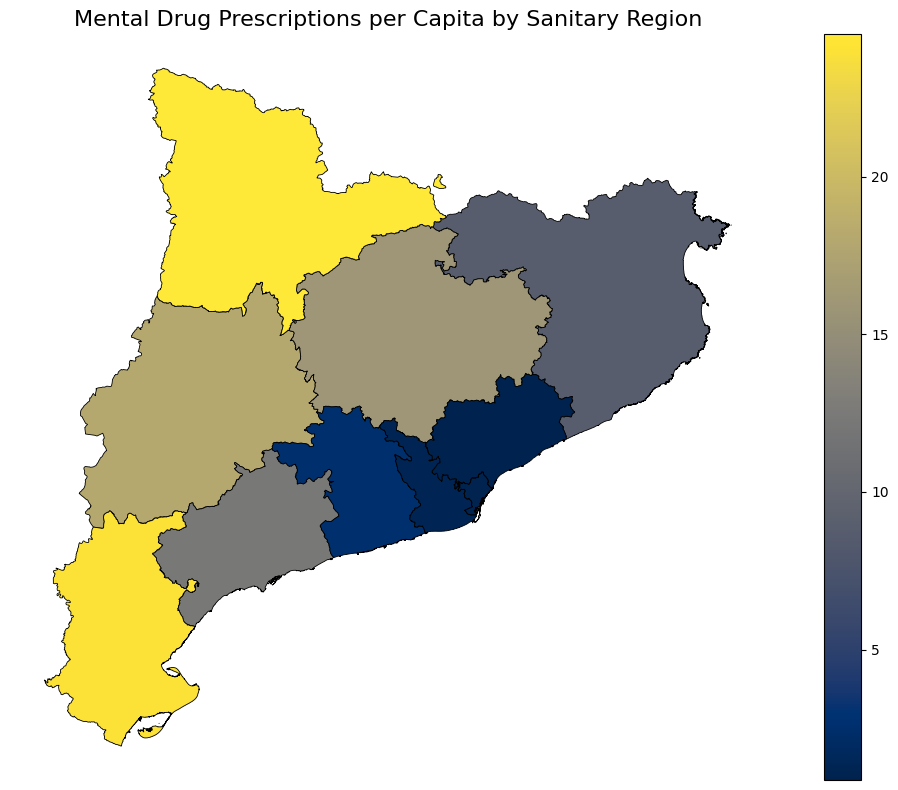

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. GeoJSON

gdf = gpd.read_file("Ad_Dataset.geojson")
gdf = gdf.rename(columns={"nom": "Regió Sanitària"})

# 2. DRUGS CSV (with auto column detection)

df = pd.read_csv("Dataset.csv", encoding="latin-1")
for i, col in enumerate(df.columns):
    print(i, col)

# 3. POPULATION CSV 

df_population = pd.read_csv('Ad_Dataset2.csv', encoding='latin-1')
        
# Display column names to see what we're working with
print("Columns in population CSV:")
print(df_population.columns.tolist())
        
# Rename columns if they have encoding issues
if 'RegiÃ³ SanitÃ ria' in df_population.columns:
            df_population = df_population.rename(columns={'RegiÃ³ SanitÃ ria': 'Regió Sanitària'})
if 'poblaciÃ³ oficial' in df_population.columns:
            df_population = df_population.rename(columns={'poblaciÃ³ oficial': 'població oficial'})
        
# Check available years
available_years = df_population['any'].unique()
print(f"Available years: {sorted(available_years)}")
        
# Filter for year 2025 (or use latest available)
if 2025 in available_years:
    df_2025 = df_population[df_population['any'] == 2025]
    print(f"Using data from year: 2025")
else:
    latest_year = max(available_years)
    df_2025 = df_population[df_population['any'] == latest_year]
    print(f"2025 not found. Using latest available year: {latest_year}")
        
print(f"Filtered data shape: {df_2025.shape}")
        
# Sum population by region
population_by_region = df_2025.groupby('Regió Sanitària')['població oficial'].sum().reset_index()
        
print(f"\nPopulation data regions: {population_by_region['Regió Sanitària'].unique()}")
        
    # Mapping dictionary to standardize region names
region_mapping = {
    'ALT PIRINEU i ARAN': 'Alt Pirineu i Aran',
    'ALTRES': 'No consta',
    'BARCELONA': 'Barcelona Ciutat',
    'BARCELONA CIUTAT': 'Barcelona Ciutat',
    'BARCELONA METROPOLITANA NORD': 'Barcelona Metropolitana Nord',
    'BARCELONA METROPOLITANA SUD': 'Barcelona Metropolitana Sud',
    'CAMP DE TARRAGONA': 'Camp de Tarragona',
    'CATALUNYA CENTRAL': 'Catalunya Central',
    'GIRONA': 'Girona',
    'LLEIDA': 'Lleida',
    'PENEDÃ\x88S': 'Penedès',
    'SENSE ESPECIFICAR': 'No consta',
    "TERRES DE L'EBRE": "Terres de l'Ebre"
}
        
# Apply mapping to population data
population_by_region['Regió Sanitària'] = population_by_region['Regió Sanitària'].map(region_mapping)
population_by_region = population_by_region.dropna(subset=['Regió Sanitària'])
        
print(f"\nAfter mapping - GeoJSON regions: {sorted(gdf['Regió Sanitària'].unique())}")
print(f"After mapping - Population regions: {sorted(population_by_region['Regió Sanitària'].unique())}")

# Merge GeoJSON with population data
merged_gdf = gdf.merge(population_by_region, on='Regió Sanitària', how='left')
        
print(f"\nMerged GeoDataFrame shape: {merged_gdf.shape}")
print("Merged data sample:")
print(merged_gdf[['Regió Sanitària', 'població oficial']].head())
        
# Check for regions with missing data
missing_data = merged_gdf[merged_gdf['població oficial'].isna()]
if len(missing_data) > 0:
    print(f"\nRegions with missing population data: {len(missing_data)}")
    print(missing_data['Regió Sanitària'].tolist())

# Rename the corrupted column names
column_mapping = {
    'regiÃ³ sanitÃ ria': 'regió sanitària',
}
df = df.rename(columns=column_mapping)

# Select the columns we need
columns_to_merge = df[['regió sanitària', 'grup ATC nivell 3', 'nombre de receptes']]

# Filter for mental groups
mental_groups = [
    "ANTIDEPRESIVOS",
    "ANSIOLITICOS",
    "ANTIPSICOTICOS", 
    "HIPNOTICOS Y SEDANTES",
    "FARMACOS USADOS EN DESORDENES ADICTIVOS",
    "PSICOLEPTICOS Y PSICOANALEPTICOS EN COMBINACION",
    "PSICOESTIMULANTES, AGENTES UTILIZADOS PARA EL TDAH Y NOOTROPICOS",
    "PSICOESTIMULANTES, AGENTES UTILIZADOS PARA LA ADHD Y NOOTROPICOS",
    "OTROS FARMACOS QUE ACTUAN SOBRE EL SISTEMA NERVIOSO"
]

mental_drugs_df = columns_to_merge[columns_to_merge['grup ATC nivell 3'].isin(mental_groups)]

# SUM ALL mental drug prescriptions grouped ONLY by sanitary region
summed_by_region = mental_drugs_df.groupby('regió sanitària')['nombre de receptes'].sum().reset_index()


# Create a mapping dictionary to standardize region names
region_mapping = {
    'ALT PIRINEU i ARAN': 'Alt Pirineu i Aran',
    'ALTRES': 'No consta',  # Map 'ALTRES' to 'No consta'
    'BARCELONA': 'Barcelona Ciutat',  # Assuming BARCELONA refers to Barcelona Ciutat
    'BARCELONA CIUTAT': 'Barcelona Ciutat',
    'BARCELONA METROPOLITANA NORD': 'Barcelona Metropolitana Nord',
    'BARCELONA METROPOLITANA SUD': 'Barcelona Metropolitana Sud',
    'CAMP DE TARRAGONA': 'Camp de Tarragona',
    'CATALUNYA CENTRAL': 'Catalunya Central',
    'GIRONA': 'Girona',
    'LLEIDA': 'Lleida',
    'PENEDÃ\x88S': 'Penedès',  # Fix encoding issue
    'SENSE ESPECIFICAR': 'No consta',  # Map 'SENSE ESPECIFICAR' to 'No consta'
    "TERRES DE L'EBRE": "Terres de l'Ebre"
}

# Apply the mapping to the CSV data
summed_by_region['regió sanitària'] = summed_by_region['regió sanitària'].map(region_mapping)

# Remove any rows that couldn't be mapped (if any)
summed_by_region = summed_by_region.dropna(subset=['regió sanitària'])

print("\nAfter mapping:")
print(f"GeoDataFrame regions: {sorted(gdf['Regió Sanitària'].unique())}")
print(f"CSV regions: {sorted(summed_by_region['regió sanitària'].unique())}")

summed_by_region = summed_by_region.rename(columns={"regió sanitària": "Regió Sanitària"})

merged = merged_gdf.merge(summed_by_region, on="Regió Sanitària", how="left")

merged["receptes_per_capita"] = merged["nombre de receptes"] / merged["població oficial"]

# 6. Plot heatmap

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

merged.plot(
    column="receptes_per_capita",
    ax=ax,
    cmap="cividis",
    legend=True,
    edgecolor="black",
    linewidth=0.6,
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

plt.title("Mental Drug Prescriptions per Capita by Sanitary Region", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()
